In [2]:
%config IPCompleter.greedy=True #Allows autocompletion by tab button

import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline 

#### Binary Images and Segmentation

In [8]:
%%writefile segmentationBlob.py

import numpy as np
import cv2

bw = cv2.imread('inputs/detect_blob.png', 0)
height, width = bw.shape[0:2]
cv2.imshow("Original BW",bw)

binary = np.zeros([height,width,1],'uint8')

thresh = 85
# the Slow way to threshold an image
for row in range(0,height):
	for col in range(0, width):
		if bw[row][col]>thresh:
			binary[row][col]=255

cv2.imshow("Slow Binary",binary)

#the Faster way to threshold an image 
ret, thresh = cv2.threshold(bw,thresh,255,cv2.THRESH_BINARY)
cv2.imshow("CV Threshold",thresh)

cv2.waitKey(0)
cv2.destroyAllWindows()

Overwriting segmentationBlob.py


In [9]:
%run segmentationBlob.py

#### Adaptive Thresholding

In [10]:
%%writefile segmentationAdaptive.py
import numpy as np
import cv2

img = cv2.imread('inputs/sudoku.png',0)
cv2.imshow("Original",img)

ret, thresh_basic = cv2.threshold(img,70,255,cv2.THRESH_BINARY)
cv2.imshow("Basic Binary",thresh_basic)

thres_adapt = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2.imshow("Adaptive Threshold",thres_adapt)

cv2.waitKey(0)
cv2.destroyAllWindows()

Writing segmentationAdaptive.py


In [11]:
%run segmentationAdaptive.py

#### Skin Detection

In [15]:
%%writefile skinDetection.py
import numpy as np
import cv2

img = cv2.imread('inputs/faces.jpeg',1)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

hsv_split = np.concatenate((h,s,v), axis=1)
cv2.imshow("Split HSV",hsv_split)

ret, min_sat = cv2.threshold(s,40,255, cv2.THRESH_BINARY)
cv2.imshow("Sat Filter",min_sat)

ret, max_hue = cv2.threshold(h,15, 255, cv2.THRESH_BINARY_INV)
cv2.imshow("Hue Filter",max_hue)

final = cv2.bitwise_and(min_sat,max_hue)
cv2.imshow("Final",final)
cv2.imshow("Original",img)

cv2.waitKey(0)
cv2.destroyAllWindows()


Overwriting skinDetection.py


In [13]:
%run skinDetection.py

#### Introduction to Contours object detection

Text(0.5,1,'Contours')

<Figure size 432x288 with 0 Axes>

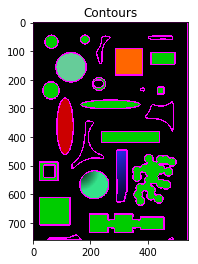

In [4]:
#%%writefile contourObjectDetection.py
#import numpy as np
#import cv2

img = cv2.imread('inputs/detect_blob.png',1)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
plt.figure()
cv2.imwrite("outputs/BinaryBlob.png",thresh)


_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img2 = img.copy()
index = -1
thickness = 4
color = (255, 0, 255)

cv2.drawContours(img2, contours, index, color, thickness)
plt.figure()
plt.imshow(img2)
plt.title("Contours")
#cv2.waitKey(0)
#cv2.destroyAllWindows()


#### Area, Perimeters, centre, and curvature

Area: 86.5, perimeter: 45.5563489199
Area: 959.5, perimeter: 251.840619683
Area: 13091.5, perimeter: 754.041630149
Area: 10069.5, perimeter: 401.414213538
Area: 7780.0, perimeter: 329.220344305
Area: 4160.0, perimeter: 258.0
Area: 1672.0, perimeter: 160.485281229
Area: 14515.0, perimeter: 1225.76867533
Area: 6357.0, perimeter: 446.911687255
Area: 7718.0, perimeter: 484.828427076
Area: 4592.5, perimeter: 502.031526327
Area: 5014.0, perimeter: 357.279218316
Area: 5019.0, perimeter: 444.367530823
Area: 8829.0, perimeter: 450.592926383
Area: 108.0, perimeter: 41.7989895344
Area: 551.5, perimeter: 93.4142135382
Area: 2707.5, perimeter: 194.752307653
Area: 1644.5, perimeter: 152.124890447
Area: 767.0, perimeter: 105.740114331
Area: 3501.5, perimeter: 251.071067691
Area: 8556.0, perimeter: 345.705624938
Area: 8868.0, perimeter: 378.828427076
Area: 865.0, perimeter: 185.455843568
Area: 1482.0, perimeter: 244.166520357
Area: 747.0, perimeter: 102.911687255
Area: 1638.0, perimeter: 152.367530346

Text(0.5,1,'Contours')

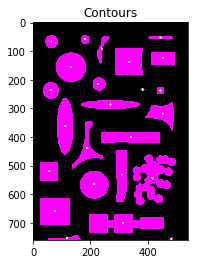

In [6]:
import numpy as np
import cv2

img = cv2.imread('inputs/detect_blob.png',1)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)


_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img2 = img.copy()
index = -1
thickness = 4
color = (255, 0, 255)

objects = np.zeros([img.shape[0], img.shape[1],3], 'uint8')
for c in contours:
    cv2.drawContours(objects, [c], -1, color, -1)

    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c, True)
    
    M = cv2.moments(c)
    cx = int( M['m10']/M['m00'])
    cy = int( M['m01']/M['m00'])
    cv2.circle(objects, (cx,cy), 4, (255,255,255), -1)

    print("Area: {}, perimeter: {}".format(area,perimeter))
plt.figure()
plt.imshow(objects)
plt.title("Contours")



#### Canny Edge detection

In [13]:
%%writefile CannyEdgeExample.py

import numpy as np
import cv2

img = cv2.imread("inputs/tomatoes.jpg",1)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
res,thresh = cv2.threshold(hsv[:,:,0], 25, 255, cv2.THRESH_BINARY_INV)
cv2.imshow("Thresh",thresh)

#Canny Edge Detector
edges = cv2.Canny(img, 100, 70)
cv2.imshow("Canny",edges)

cv2.waitKey(0)
cv2.destroyAllWindows()

Overwriting CannyEdgeExample.py


In [12]:
%run CannyEdgeExample.py

#### Overall Object Detection
##### Assign object ID and Attributes

In [14]:
%%writefile DetectObjectandAttr.py


import numpy as np
import cv2
import random

img = cv2.imread("inputs/fuzzy.png",1)
cv2.imshow("Original",img)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3),0)

thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 205, 1)
cv2.imshow("Binary",thresh)

_, contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

filtered = []
for c in contours:
	if cv2.contourArea(c) < 1000:continue
	filtered.append(c)

print(len(filtered))

objects = np.zeros([img.shape[0],img.shape[1],3], 'uint8')
for c in filtered:
	col = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
	cv2.drawContours(objects,[c], -1, col, -1)
	area = cv2.contourArea(c)
	p = cv2.arcLength(c,True)
	print(area,p)

cv2.imshow("Contours",objects)
	

cv2.waitKey(0)
cv2.destroyAllWindows()

Writing DetectObjectandAttr.py


In [15]:
%run DetectObjectandAttr.py

2053
4
(4926.0, 298.2253956794739)
(29882.0, 795.3868639469147)
(1038.0, 645.0681030750275)
(17250.0, 585.0782079696655)
